In [5]:
import os
from google.cloud import bigquery
from IPython.display import display

# 環境変数に設定
cwd = os.getcwd()
credentials = 'npsdev-manage-project-b86ba8a617d2.json'
key_path = os.path.join(cwd,"credentials",credentials)
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = key_path

In [6]:
project_id = 'npsdev-manage-project'
dataset_id = 'share_dataset'
table_id = 'junction_hn_nps_file_regist_count_per_minute'

client = bigquery.Client(project=project_id)

In [160]:
def plt_show_days (start_date,end_date,leap_year,year):

    import pandas as pd

    sql = f"""
    SELECT CAST(registration_date AS DATE) day,
    COUNT(registration_date)
    FROM {dataset_id}.{table_id}
    WhERE registration_date >= '{start_date}' AND registration_date <= '{end_date}'
    GROUP BY day
    ORDER BY day
    """
    #print(sql)
    df = client.query(sql).to_dataframe()

    if not leap_year:
        day_0229 = 58
        dfA = df[0:day_0229]
        dfB = pd.Series(['Nan', 'Nan'], index=df.columns,name="tmp")
        dfC = df[day_0229+1:]
        print(dfA)
        print(dfB)
        print(dfC)
        df = pd.concat([dfA,dfB,dfC])
        #df = df.set_axis([i for i in range(366)], axis="index")
      
    
    
    df = df.fillna(method='ffill')

    #display(sql)
    import matplotlib.pyplot as plt
    plt.ylabel("printVol")
    plt.plot(df["day"], df["f0_"], label=year)
    plt.legend(loc = 'upper left')
    plt.show()

    print(df.info)

    return df


日時集計

           day    f0_
0   2018-01-01  20451
1   2018-01-02  20597
2   2018-01-03  22802
3   2018-01-04  24959
4   2018-01-05  24991
5   2018-01-06  23921
6   2018-01-07  24015
7   2018-01-08  26137
8   2018-01-09  26654
9   2018-01-10  27828
10  2018-01-11  28211
11  2018-01-12  25746
12  2018-01-13  23657
13  2018-01-14  25332
14  2018-01-15  27302
15  2018-01-16  26901
16  2018-01-17  25550
17  2018-01-18  27298
18  2018-01-19  25974
19  2018-01-20  24124
20  2018-01-21  25152
21  2018-01-22  24888
22  2018-01-23  25123
23  2018-01-24  26550
24  2018-01-25  26013
25  2018-01-26  25015
26  2018-01-27  24336
27  2018-01-28  25318
28  2018-01-29  26805
29  2018-01-30  26405
30  2018-01-31  27037
31  2018-02-01  25535
32  2018-02-02  24467
33  2018-02-03  24209
34  2018-02-04  24603
35  2018-02-05  26017
36  2018-02-06  25344
37  2018-02-07  26013
38  2018-02-08  26474
39  2018-02-09  25620
40  2018-02-10  23576
41  2018-02-11  23948
42  2018-02-12  25427
43  2018-02-13  26677
44  2018-0

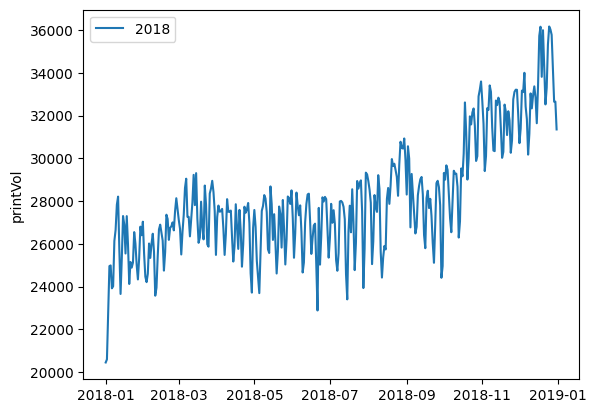

<bound method DataFrame.info of             day    f0_    0
0    2018-01-01  20451  NaN
1    2018-01-02  20597  NaN
2    2018-01-03  22802  NaN
3    2018-01-04  24959  NaN
4    2018-01-05  24991  NaN
..          ...    ...  ...
360  2018-12-27  35779  Nan
361  2018-12-28  34222  Nan
362  2018-12-29  32650  Nan
363  2018-12-30  32655  Nan
364  2018-12-31  31354  Nan

[366 rows x 3 columns]>


In [161]:
df_2018 = plt_show_days('2018-01-01','2018-12-31',False,"2018")
#df_2019 = plt_show_days('2019-01-01','2019-12-31',False,"2019")
#df_2020 = plt_show_days('2020-01-01','2020-12-31',True,"2020")
#df_2021 = plt_show_days('2021-01-01','2021-12-31',False,"2021")


,day,f0_
0,2021-01-01,40157
1,2021-01-02,39768
2,2021-01-03,41734
3,2021-01-04,45885
4,2021-01-05,47191
...,...,...
360,2021-12-27,49770
361,2021-12-28,49047
362,2021-12-29,49723
363,2021-12-30,48492


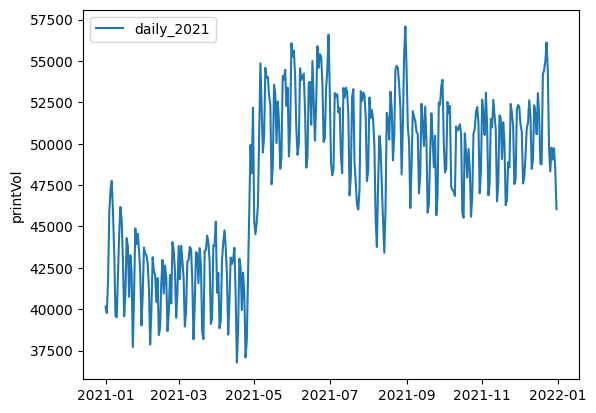

In [115]:
sql_2021 = f"""
SELECT CAST(registration_date AS DATE) day,
  COUNT(registration_date)
FROM {dataset_id}.{table_id}
WhERE registration_date >='2021-01-01' AND registration_date <='2021-12-31'
GROUP BY day
ORDER BY day
"""
df_2021 = client.query(sql_2021).to_dataframe()
display(df_2021)

import matplotlib.pyplot as plt
plt.ylabel("printVol")
plt.plot(df_2021["day"], df_2021["f0_"], label="daily_2021")
plt.legend(loc = 'upper left')
plt.show()

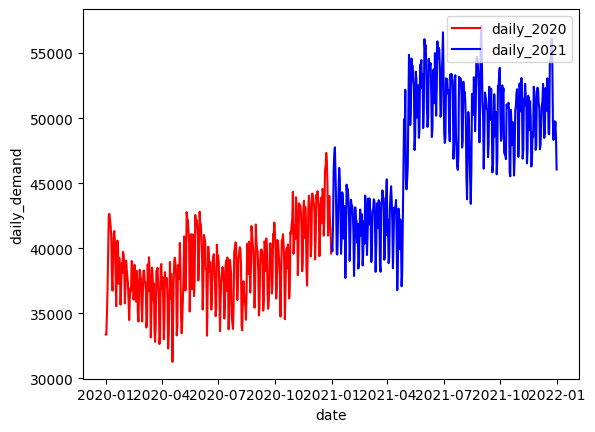

In [129]:
#df_1 = df_2021 - 365
import datetime
import pandas as pd

#df = df_2021["day"]-df[0]
df_1 = df_2020.rename(columns={'day': 'day-2020','f0_': 'count-2020'})
df_2 = df_2021.rename(columns={'day': 'day-2021','f0_': 'count-2021'})

#df_1["day-2021"] = df_2["day-2021"]
day_0229 = 58
dfA = df_2[0:day_0229]
dfB = pd.Series(['Nan', 'Nan'], index=df_2.columns)
dfC = df_2[day_0229+1:]

df_2 = pd.concat([dfA,dfB,dfC]).set_axis([i for i in range(366)], axis=0)

df_1 = df_1.fillna(method='ffill')
df_2 = df_2.fillna(method='ffill')

df_concat = pd.concat([df_1,df_2],axis=1)

df_concat.isnull().sum()


day-2020       0
count-2020     0
day-2021       0
count-2021     0
0             58
dtype: int64

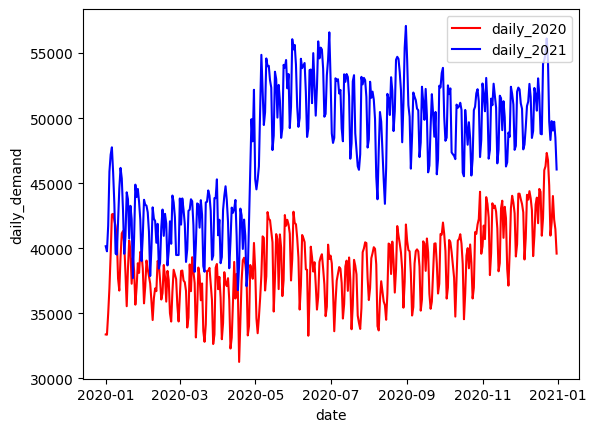

In [130]:
#可視化
plt.plot(df_concat["day-2020"], df_concat["count-2020"], label="daily_2020", color ="red")
plt.plot(df_concat["day-2020"], df_concat["count-2021"], label="daily_2021", color ="blue")
plt.ylabel("daily_demand")
plt.xlabel("date")
plt.legend(loc = 'upper right')
plt.show()

月次集計

In [23]:
sql = f"""
SELECT DATE_TRUNC(CAST(registration_date AS DATE), MONTH) AS month,
    COUNT(registration_date)
FROM {dataset_id}.{table_id}
WhERE registration_date >='2020-01-01' AND registration_date <='2020-12-31'
GROUP BY month
ORDER BY month
"""

df = client.query(sql).to_dataframe()
display(df)


,month,f0_
0,2020-01-01,1165862
1,2020-02-01,1071907
2,2020-03-01,1133562
3,2020-04-01,1096033
4,2020-05-01,1213132
5,2020-06-01,1156255
6,2020-07-01,1157681
7,2020-08-01,1180083
8,2020-09-01,1159704
9,2020-10-01,1216908


'\nquery_job = client.query(sql)\n\nprint(type(query_job))\n\nprint("The query data:")\nfor row in query_job:\n    # Row values can be accessed by field name or index.\n    print(type(row))\n    print(row[0])\n    #print("name={}, count={}".format(row[0], row["total_people"]))\n'